YAPAY SİNİR AĞLARI (ANN) İLE RAKAM TANIMA

1) İş Problemi (Business Problem)  ==> El yazısı tanıma

2) Veriyi Anlamak (Data Understanding)

3) Veriyi Hazırlamak (Data Preparation)

4) Modelleme (Modeling)

5) Değerlendirme (Evaluation)

# 1) İş Problemi (Business Problem)

Problem: İnsan gücü kaynağını daha verimli kullanabilir miyiz?

MNIST ("Modified Nationaş Institute of Standards and Technology")

<img src="https://storage.googleapis.come/khanlvg-public.appspot.com/digit-classifier/mnist.png" />

Veri seti hakkında daha fazla bilgi için: http://yann.lecun.com/exdb/mnist/index.html adresini ziyaret edebilirsiniz

In [1]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 895.9/895.9 kB 1.7 MB/s eta 0:00:00
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
     ------------------------------------ 177.8/177.8 kB 896.0 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  U

# 2) Veriyi Anlamak (Data Understanding)

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [6]:
# Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [7]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)  # 60000 adet, 28x28 pikselden oluşan görsel mevcut.

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [8]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape) # 10000 adet, 28x28 pikselden oluşan görsel mevcut.

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [10]:
num_labels = len(np.unique(y_train))  # 0' dan 9'a kadar olan rakamların sayısı toplam 10'dur.

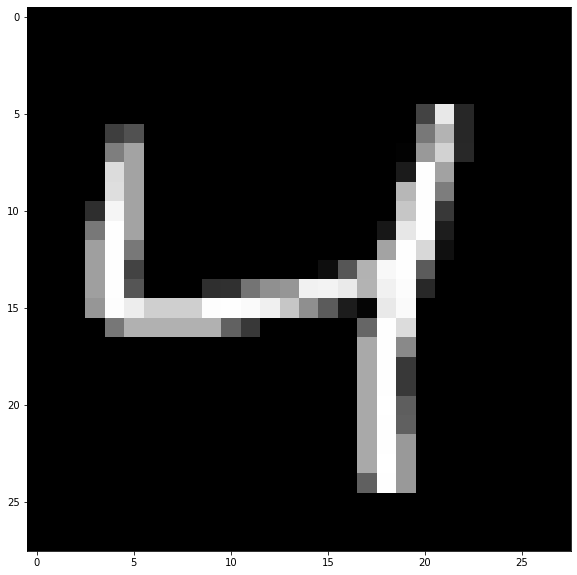

In [60]:
# Veri Setinden Örneklerin Gösterilmesi

plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap= "gray")  # 2. indisteki görsel.

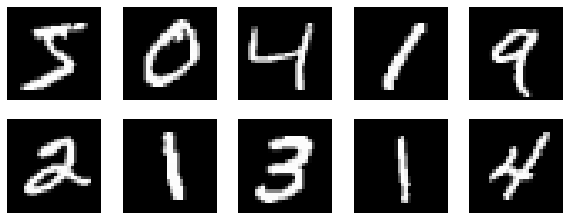

In [59]:
plt.figure(figsize=(10,10))  # Buradaki for loop'u ile 10 adet görseli gösteriyoruz.
for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap="gray")
    plt.axis("off")

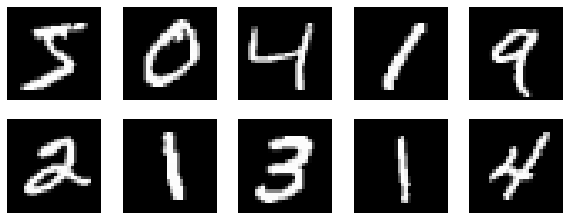

In [19]:
def visualize_img(data):   # Göstermek istediğimiz görselleri, daha kolay ulaşabilmek için bir fonksiyona atadık.
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n], cmap="gray")
        plt.axis("off")

visualize_img(x_train)


In [20]:
# RGB (0-255)
# 0'a doğru gidildikçe siyahlaşır, 255'e doğru gidildikçe beyazlaşır.
# r:250 g:10 b:240  ==> mor rengini veren uluslararası bir format
# r:250 g:0 b:250 ==> daha koyu bir mor rengi.
# w3schools.com/colors/colors_rgb.asp adresinden farklı farklı renkler test edilebilir.

In [21]:
x_train[2].shape

(28, 28)

In [37]:
# x_train'de 2.sıradaki görselin renklerine denk gelen nümerik değerler bir array formatında görülüyor.
x_train[2]  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

x_train'de 2.sıradaki görselin 10x10. piksel değeri:  0 'dır


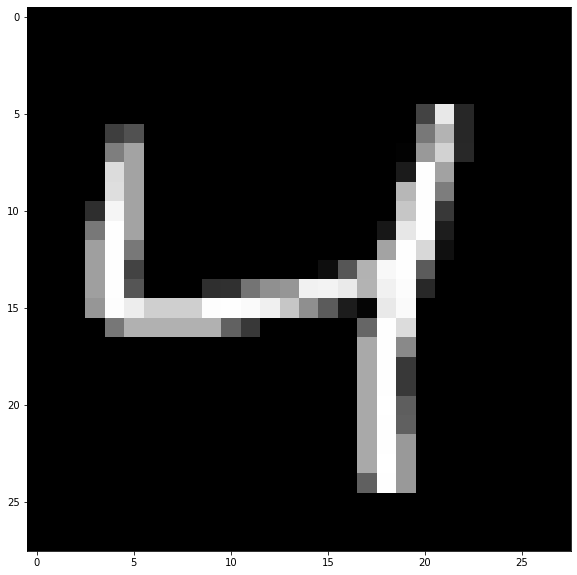

In [35]:
print("x_train'de 2.sıradaki görselin 10x10. piksel değeri: ",x_train[2][10,10], "'dır") 

# x_train'de 2.sıradaki görselin, 10x10. görseli siyah olmalıdır. 
# Çünkü burada 0 olduğunu gördük.
# Görseli kontrol edelim.

plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap= "gray")

# x ekseninde 10 ve y ekseninde 10 değerlerini takip edersek siyah bir bölge olduğunu görürüz.


x_train'de 2.sıradaki görselin 15x4. piksel değeri:  253 'dur


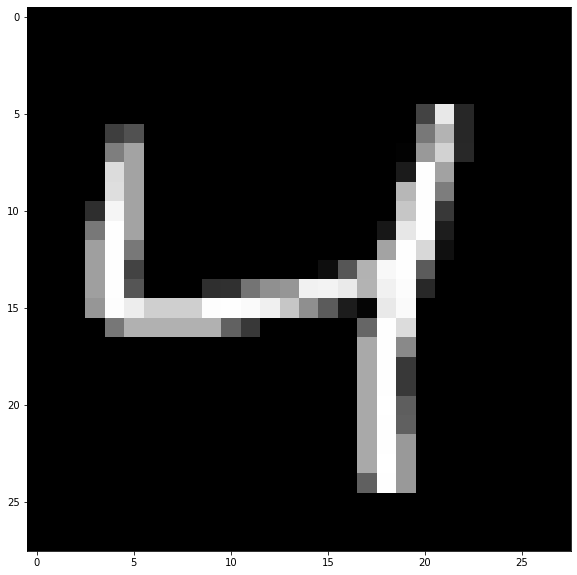

In [43]:
# Bir de beyaz bir bölge bulmaya çalışalım ve onun nümerik değerini kontrol edelim.

print("x_train'de 2.sıradaki görselin 15x4. piksel değeri: ",x_train[2][15,4], "'dur")

# x_train'de 2.sıradaki görselin, 15x4. görseli beyaz olmalıdır. 
# Çünkü burada 253 olduğunu gördük. Neredeyse 255 yani oldukça beyaz.
# Görseli kontrol edelim.

plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap= "gray")

# x ekseninde 4 ve y ekseninde 15 değerlerini takip edersek beyaz bir bölge olduğunu görürüz.


In [45]:
x_train[2].mean()  # bu resmin nümerik temsili 24 civarında olabilir.
#x_train[2].sum()

19443

In [48]:
# x_train'de 2. sıradaki görselin nümerik gösteriminden (array içinden) bir kesit alalım.
# Görselin bir noktasına zoom yapmışız gibi düşünülebilir.

x_train[2][14:20, 10:20]  

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [49]:
x_train[2][14:20, 10:20].mean()  # zoom yaptığımız bölgenin nümerik temsili bu olabilir.

96.51666666666667

In [54]:
# Şimdi de seçeceğimiz bir görseli, nümerik gösterimleri ile birlikte yazdıracak bir fonksiyon yazalım.

def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    
    threshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            
            ax.annotate(str(round(img[x][y], 2)), 
                        xy = (y,x),
                        color = "white" if img[x][y] < threshold else "black")

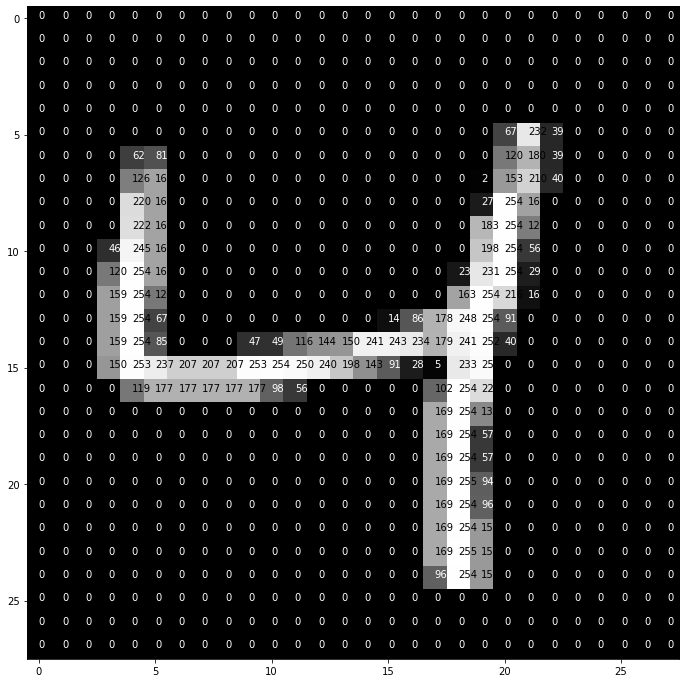

In [57]:
pixel_visualize(x_train[2])

# 3) Veriyi Hazırlamak (Data Preparation)

## Encoding

- Önce : [0 1 2 3 4 5 6 7 8 9]

--> Encoding yöntemiyle gösterilmek istenen rakama denk gelen indis 1, diğer tüm indisler 0 olur.

- Sonra: [0 0 1 0 0 0 0 0 0 0]

--> Burada gösterilecek değer 2 rakamı olur. Sadece onun indisine denk gelen sayı 1, diğerleri 0'dır. 

In [61]:
# y_train'de yer alan bir bölgeden kesit aldık. Sonuçlarını rakamlar ile görüyoruz.
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [62]:
# Encoding yöntemini uyguluyoruz.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [64]:
# Encoding yöntemi uygulandıktan sonra tekrar aynı bölgenin kestini alıyoruz ve sadece 0 ve 1'lerden oluşan array karşımıza çıkıyor.
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In [65]:
image_size = x_train.shape[1]

In [66]:
image_size

28

In [68]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [69]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# reshape methodu sonrasında parantez içerisine eklenen 1 değerleri, görsellerdeki piksellerin değerlerini tutmaktadır.

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


## Normalization

- Bu bölümde piksellerde yer alan 0-255 arasındaki değerleri 0-1 arasına alacağız yani standartlaştıracağız.
- Bu sayede öğrenme hızını artırabiliyoruz.

In [72]:
# Standardization

x_train = x_train.astype("float32") / 255

x_test = x_test.astype("float32") / 255

# float32'ye dönüştürmemizdeki amacımız, programatik performans açısından işlerimizi hızlandırmak.

## 4) Modelleme (Modeling)

### Sinir Ağı Mimarisini Tanımlamak

In [83]:
# Model kuruyoruz. Burada sequential, sıralı demektir. 
# Bu yapı sayesinde sıralı katmanlardan oluşan bir YSA kolay bir şekilde oluşturulabilir.

model = tf.keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),                                          # Flatten bizim giriş katmanımız.
    Dense(units = 128, activation = "relu", name = "layer1"),                    # Dense bizim hidden katmanımız.
    Dense(units = num_labels, activation = "softmax", name = "output_layer")     # Çıktı katmanımız da burasıdır.
])

# Modelimizi bir apartman olarak düşünecek olursak ilk bölümde dış cephesini tamamladık.
# Dense içerisindeki units, nöron sayısını temsil etmektedir. 
# Burada 128 kullanılmasının sebebi literatürde MNİST veri seti için 128'in yaygın olarak kullanılmasıdır.
# Elimizde bir araç tahmin modeli olsaydu bu units değerini belki de 10 yapacaktık ancak MNİST için 128 olması gerektiği düşünülüyor.
# Yani görsellerin bulunduğu veri setindeki ağırlıkları belirlememize yarayan 128 tane özellik olduğu düşünülüyor.
# Bu özellikler 10 tane rakamı sınıflandırmak için ağırlıkları belirlenecek olan özelliklerdir.

# Hidden layer'da kullanılan aktivasyon fonksiyonu "relu"dur. Gizli katmanlarda relu kullanılır.
# İnsan sinir hücrelerine çok benzeyen "relu" aktivasyon fonksiyonları, nöronları söndürme ya da ateşleme görevlerini üstlenir.
# Bir nöron işe yaramayacaksa onu söndürecek ve işlemlerim süresinin kısalmasını sağlayacaktır.

# Son katmanda (çıktı katmanı) kullanılan aktivasyon fonksiyonu "softmax"tir. Bir sınıflandırma problemi ile ilgileniyoruz ve çıktımızda sınıflanıdrılmasını beklediğimiz 10 farklı sonuç var (0-9 rakamlar).
# Çok sınıflı bir sınıflandırma görevinde olduğumuzdan dolayı "softmax"i tercih ettik. Eğer iki sınıflı bir sınıflandırma problemi olsaydı, çıktı katmanında "sigmoid" aktivasyon fonksiyonunu kullanacaktık.
# 10 adet sınıf olduğu için çıktı katmanında 10 adet nöronumuz olacak. Onu da num_labels (rakamları atadığımız değişken) olarak belirledik yani 10. 

model.compile(loss = "categorical_crossentropy",  # Burada "loss", hata değerlendirme metriğidir. Amaç bu fonksiyonu minimize etmektir. Çok sınıflı (3,4,5,10 sınıflı) bir sınıflandırma problemi söz konusu olduğu için "categorical_crossentropy" kullanıyoruz. Bu da optimize edilmesi gereken kayıp fonksiyonunu ifade etmektedir.
              optimizer = "adam", # loss fonksiyonunu minimize edecek optimizasyon yöntemi, algoritmasıdır. "Stochastic Gradient Descent" bunlardan birisidir. "Adam" bunlardan birisidir. Biz "Adam" ı kullanacağız. Farklı alternatifler de denenebilir.
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])   # Burada "metrics" ile çağırdığımız şeyler aslında modelin başarını kontrol etmek içindir. Sadece accuracy ie de kontrol edebiliriz ama birkaç tane de ona destek olacak şey çağırdık.
# model.compile ile de mimariyi hazırladıktan sonra bu özellikler ile modeli kur demek istedik.

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_test, y_test))  # Epoch = 5 iken hatayı kontrol edelim.

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 2.3015 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1117 - val_loss: 2.3010 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3009 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3011 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3007 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3009 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3004 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/5
469/469 [=========================

In [85]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test)) # Epoch = 10 iken hatayı kontrol edelim.

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.3015 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.1120 - val_loss: 2.3009 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.3012 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3007 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.3010 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3004 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 2.3006 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.1124 - val_loss: 2.3000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/

## 5) Model Başarısını Değerlendirme (Evaluation)

In [131]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test)) # Epoch = 10 iken hatayı kontrol edelim.

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3287 - precision_1: 0.9320 - recall_1: 0.8825 - accuracy: 0.9067 - val_loss: 0.3208 - val_precision_1: 0.9308 - val_recall_1: 0.8856 - val_accuracy: 0.9095
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3279 - precision_1: 0.9329 - recall_1: 0.8833 - accuracy: 0.9076 - val_loss: 0.3188 - val_precision_1: 0.9321 - val_recall_1: 0.8890 - val_accuracy: 0.9102
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3283 - precision_1: 0.9318 - recall_1: 0.8830 - accuracy: 0.9073 - val_loss: 0.3223 - val_precision_1: 0.9321 - val_recall_1: 0.8866 - val_accuracy: 0.9080
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3277 - precision_1: 0.9329 - recall_1: 0.8832 - accuracy: 0.9076 - val_loss: 0.3227 - val_precision_1: 0.9333 - val_recall_1: 0.8878 - val_accuracy: 0.9101
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss

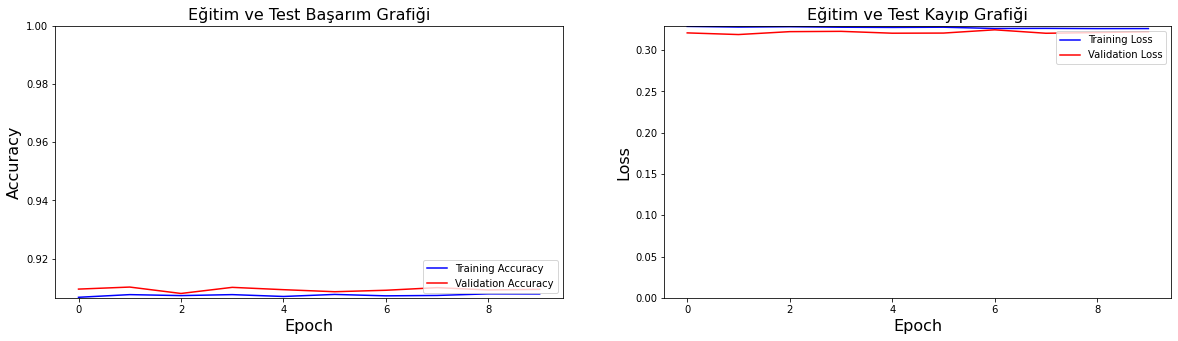

In [132]:
####################################
###  Accuracy ve Loss Grafikleri ###
####################################

#---------------- Grafik 1 Accuracy ----------------#

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color = "b", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize = 16)


#---------------- Grafik 2 Loss --------------------#

plt.subplot(1,2,2)
plt.plot(history.history["loss"], color = "b", label = "Training Loss")
plt.plot(history.history["val_loss"], color = "r", label = "Validation Loss")
plt.legend(loc = "upper right")
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.ylim([0, max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize = 16)
plt.show()

In [133]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose = False)
print("\nTest Accuracy: %.1f%%" % (100.0*acc))
print("\nTest Loss: %.1f%%" % (100.0*loss))
print("\nTest Precision: %.1f%%" % (100.0*precision))
print("\nTest Recall: %.1f%%" % (100.0*recall))


Test Accuracy: 90.9%

Test Loss: 32.2%

Test Precision: 93.4%

Test Recall: 88.8%


## Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [134]:
model.save("mnist_model.h5")

In [144]:
import random

random = random.randint(0, x_test.shape[0])

In [145]:
random

7919

In [146]:
test_image = x_test[random]

In [147]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

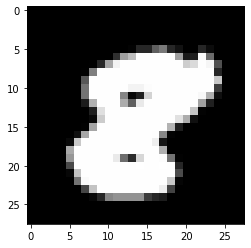

In [148]:
plt.imshow(test_image.reshape(28,28), cmap = "gray");

In [150]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [151]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 82ms/step


In [153]:
probability

array([[3.63153405e-04, 9.25558030e-09, 4.64896846e-04, 5.00121787e-05,
        1.43389207e-06, 1.04307476e-03, 5.06621575e-07, 3.76422037e-07,
        9.97968853e-01, 1.07692824e-04]], dtype=float32)

In [154]:
predicted_classes = np.argmax(probability)

In [155]:
predicted_classes

8

In [159]:
print(f"Tahmin Edilen Sınıf: {predicted_classes}  \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=1))[0]}  \n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

Tahmin Edilen Sınıf: 8  

Tahmin Edilen Sınıfın Olasılık Değeri: 0.997968852519989  

Diğer Sınıfların Olasılık Değerleri: 
[[3.63153405e-04 9.25558030e-09 4.64896846e-04 5.00121787e-05
  1.43389207e-06 1.04307476e-03 5.06621575e-07 3.76422037e-07
  9.97968853e-01 1.07692824e-04]]
